# CONVOLUTION

## What is Convolution ????
Convolution is a linear operation similar to a linear equation, dot product, or matrix multiplication. \\
Convolution preserves the relationship between elements, and it requires fewer parameters than other methods. \\

You can see the relationship between the different methods:

$linear \ equation :y=wx+b$

$linear\ equation\ with\ multiple \ variables \ where \ \mathbf{x} \ is \ a \ vector \ \mathbf{y}=\mathbf{wx}+b$

$ \ matrix\ multiplication \ where \ \mathbf{X} \ in \ a \ matrix \ \mathbf{y}=\mathbf{wX}+\mathbf{b} $

$\ convolution \ where \ \mathbf{X} \ and \ \mathbf{Y} \ is \ a \ tensor \  \mathbf{Y}=\mathbf{w}*\mathbf{X}+\mathbf{b}$

In convolution, the parameter <b>w</b> is called a kernel. You can perform convolution on images where you let the variable image denote the variable X and w denote the parameter.

<img src = "https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DL0110EN/notebook_images%20/chapter%206/6.1.1xw.png" width = 500, align = "center">





In [1]:
import torch
import torch.nn as nn

In [2]:
conv = nn.Conv2d(in_channels = 1, out_channels = 1, kernel_size = 3)
print(conv.weight.shape) # [out_ch, in_ch, k_h, k_w]
print(conv.weight)
print()
print(conv.bias)

torch.Size([1, 1, 3, 3])
Parameter containing:
tensor([[[[-0.1704,  0.0993,  0.1840],
          [-0.0876,  0.2393, -0.1064],
          [ 0.1848,  0.1991,  0.0764]]]], requires_grad=True)

Parameter containing:
tensor([0.0937], requires_grad=True)


In [3]:
conv.state_dict()['weight'][0][0]=torch.tensor([[1.0,0.0,-1],[2.0,0.0,-2],[1.0,0.0,-1.0]])
conv.state_dict()['bias'][0]=0.0

print(conv.weight)
print(conv.bias)

Parameter containing:
tensor([[[[ 1.,  0., -1.],
          [ 2.,  0., -2.],
          [ 1.,  0., -1.]]]], requires_grad=True)
Parameter containing:
tensor([0.], requires_grad=True)


In [4]:
img = torch.zeros(1,1,5,5)
img[0,0,:,2] = 1
print(img)
z = conv(img)
print(z)

tensor([[[[0., 0., 1., 0., 0.],
          [0., 0., 1., 0., 0.],
          [0., 0., 1., 0., 0.],
          [0., 0., 1., 0., 0.],
          [0., 0., 1., 0., 0.]]]])
tensor([[[[-4.,  0.,  4.],
          [-4.,  0.,  4.],
          [-4.,  0.,  4.]]]], grad_fn=<ConvolutionBackward0>)


The kernel performs at the element-level multiplication on every element in the image in the corresponding region. 
The values are then added together. 
The kernel is then shifted and the process is repeated.

<img src = "https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DL0110EN/notebook_images%20/chapter%206/6.1.1convltuon.gif" width = 500, align = "center">



## Determining the Size of the Output

The size of the output is an important parameter.Assume square images. For rectangular images, the same formula can be used in for each dimension independently.

Let M be the size of the input and K be the size of the kernel. The size of the output is given by the following formula:

$$M\_{new}=M-K+1$$



In [5]:
# Create Kernel of size 2 x2 
K=2
conv1 = nn.Conv2d(in_channels=1, out_channels=1,kernel_size=K)
conv1.state_dict()['weight'][0][0]=torch.tensor([[1.0,1.0],[1.0,1.0]])
conv1.state_dict()['bias'][0]=0.0
print(conv1.state_dict())
print(conv1.weight.shape)
print(conv1.weight)
print(conv1.bias)

OrderedDict([('weight', tensor([[[[1., 1.],
          [1., 1.]]]])), ('bias', tensor([0.]))])
torch.Size([1, 1, 2, 2])
Parameter containing:
tensor([[[[1., 1.],
          [1., 1.]]]], requires_grad=True)
Parameter containing:
tensor([0.], requires_grad=True)


In [6]:
# create image of size 4 x 4
M=4
image1=torch.ones(1,1,M,M)
print(image1.shape)
print(image1)

torch.Size([1, 1, 4, 4])
tensor([[[[1., 1., 1., 1.],
          [1., 1., 1., 1.],
          [1., 1., 1., 1.],
          [1., 1., 1., 1.]]]])


<img src = "https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DL0110EN/notebook_images%20/chapter%206/6.1.1kernal2.png" width = 500, align = "center">


The following equation provides the output:
$$M\_{new}=M-K+1$$
$$M\_{new}=4-2+1$$
$$M\_{new}=3$$
The following animation illustrates the process: The first iteration of the kernel overlay of the images produces one output. As the kernel is of size K, there are M-K  elements for the kernel to move in the horizontal direction. The same logic applies to the vertical direction.
<img src = "https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DL0110EN/notebook_images%20/chapter%206/6.1.1outsize.gif" width = 500, align = "center">


In [7]:
# perform conv and verify the size
z1=conv1(image1)
print("z1:",z1)
print("shape:",z1.shape[2:4])

z1: tensor([[[[4., 4., 4.],
          [4., 4., 4.],
          [4., 4., 4.]]]], grad_fn=<ConvolutionBackward0>)
shape: torch.Size([3, 3])


## Stride parameter
The parameter stride changes the number of shifts the kernel moves per iteration. As a result, the output size also changes and is given by the following formula:
$$M\_{new}=\dfrac{M-K}{stride}+1$$
Create a convolution object with a stride of 2:


In [8]:
conv3 = nn.Conv2d(in_channels=1, out_channels=1,kernel_size=2,stride=2)

conv3.state_dict()['weight'][0][0]=torch.tensor([[1.0,1.0],[1.0,1.0]])
conv3.state_dict()['bias'][0]=0.0
print(conv3.state_dict())

OrderedDict([('weight', tensor([[[[1., 1.],
          [1., 1.]]]])), ('bias', tensor([0.]))])


For an image with a size of 4, calculate the output size:
$$M\_{new}=\dfrac{M-K}{stride}+1$$
$$M\_{new}=\dfrac{4-2}{2}+1$$
$$M\_{new}=2$$
The following animation illustrates the process: The first iteration of the kernel overlay of the images produces one output. Because the kernel is of size K, there are M-K=2 elements. The stride is 2 because it will move 2 elements at a time. As a result, you divide M-K by the stride value 2:
<img src = "https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DL0110EN/notebook_images%20/chapter%206/6.1.1stride2.gif" width = 500, align = "center">

In [9]:
z3=conv3(image1)

print("image: ",image1)
print("\nz3: ",z3)
print("\nshape: ",z3.shape[2:4])

image:  tensor([[[[1., 1., 1., 1.],
          [1., 1., 1., 1.],
          [1., 1., 1., 1.],
          [1., 1., 1., 1.]]]])

z3:  tensor([[[[4., 4.],
          [4., 4.]]]], grad_fn=<ConvolutionBackward0>)

shape:  torch.Size([2, 2])


## Zero Padding
As you apply successive convolutions, the image will shrink. You can apply zero padding to keep the image at a reasonable size, which also holds information at the borders.
In addition, you might not get integer values for the size of the kernel. Consider the following image:
Try performing convolutions with the <code>kernel_size=2</code> and a <code>stride=3</code>. Use these values:

$$M\_{new}=\dfrac{M-K}{stride}+1$$
$$M\_{new}=\dfrac{4-2}{3}+1$$
$$M\_{new}=1.666$$


In [10]:
print("image: ",image1)
conv4 = nn.Conv2d(in_channels=1, out_channels=1,kernel_size=2,stride=3)
conv4.state_dict()['weight'][0][0]=torch.tensor([[1.0,1.0],[1.0,1.0]])
conv4.state_dict()['bias'][0]=0.0
conv4.state_dict()
z4=conv4(image1)
print("\nz4: ",z4)


image:  tensor([[[[1., 1., 1., 1.],
          [1., 1., 1., 1.],
          [1., 1., 1., 1.],
          [1., 1., 1., 1.]]]])

z4:  tensor([[[[4.]]]], grad_fn=<ConvolutionBackward0>)


You can add rows and columns of zeros around the image. This is called padding. In the constructor <code>Conv2d</code>, you specify the number of rows or columns of zeros that you want to add with the parameter padding.

For a square image, you merely pad an extra column of zeros to the first column and the last column. Repeat the process for the rows. As a result, for a square image, the width and height is the original size plus 2 x the number of padding elements specified. You can then determine the size of the output after subsequent operations accordingly as shown in the following equation where you determine the size of an image after padding and then applying a convolutions kernel of size K.
$$M'=M+2 \times padding$$
$$M\_{new}=\frac{M'-K}{stride}+1$$

$$M'=4+2 \times 1 = 6$$
$$M\_{new}=\frac{6-2}{3}+1=2.33$$

Consider the following example:

In [11]:
conv5 = nn.Conv2d(in_channels=1, out_channels=1,kernel_size=2,stride=3,padding=1)

conv5.state_dict()['weight'][0][0]=torch.tensor([[1.0,1.0],[1.0,1.0]])
conv5.state_dict()['bias'][0]=0.0
conv5.state_dict()
z5=conv5(image1)
print("z5:",z5)
print("z5:",z4.shape[2:4])

z5: tensor([[[[1., 2.],
          [2., 4.]]]], grad_fn=<ConvolutionBackward0>)
z5: torch.Size([1, 1])


The process is summarized as:

<img src = "https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DL0110EN/notebook_images%20/chapter%206/6.1.1zeropad.gif" width = 500, align = "center">


## Question: You have an image of size 4. The parameters are as follows  kernel_size=2,stride=2. What is the size of the output?



```
(M-K)/stride +1
(4-2)/2 +1
2
```



In [12]:
image = torch.ones(1,1,4,4)
conv3 = nn.Conv2d(in_channels=1, out_channels=1,kernel_size=2,stride=2)

conv3.state_dict()['weight'][0][0]=torch.tensor([[1.0,1.0],[1.0,1.0]])
conv3.state_dict()['bias'][0]=0.0

print(conv3(image).shape[2:4])

torch.Size([2, 2])


# Activation Functions and Max Polling 

## Activation Fn

Just like a neural network, you apply an activation function to the activation map as shown in the following image:
<img src = "https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DL0110EN/notebook_images%20/chapter%206/6.1.3block_digram.png" width = 1000, align = "center">


In [13]:
conv = nn.Conv2d(in_channels=1, out_channels=1,kernel_size=3)
Gx=torch.tensor([[1.0,0,-1.0],[2.0,0,-2.0],[1.0,0,-1.0]])
conv.state_dict()['weight'][0][0]=Gx
conv.state_dict()['bias'][0]=0.0
conv.state_dict()

OrderedDict([('weight', tensor([[[[ 1.,  0., -1.],
                        [ 2.,  0., -2.],
                        [ 1.,  0., -1.]]]])), ('bias', tensor([0.]))])

In [14]:
image=torch.zeros(1,1,5,5)
image[0,0,:,2]=1
image

tensor([[[[0., 0., 1., 0., 0.],
          [0., 0., 1., 0., 0.],
          [0., 0., 1., 0., 0.],
          [0., 0., 1., 0., 0.],
          [0., 0., 1., 0., 0.]]]])

image and kernel 

<img src = "https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DL0110EN/notebook_images%20/chapter%206/6.1.3kernal_out.png" width = 500, align = "center">


In [15]:
Z=conv(image)
print(Z)

A=torch.relu(Z)
print(A)

tensor([[[[-4.,  0.,  4.],
          [-4.,  0.,  4.],
          [-4.,  0.,  4.]]]], grad_fn=<ConvolutionBackward0>)
tensor([[[[0., 0., 4.],
          [0., 0., 4.],
          [0., 0., 4.]]]], grad_fn=<ReluBackward0>)


The Relu function is applied to each element. All the elements less than zero are mapped to zero. The remaining components do not change.
<img src = "https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DL0110EN/notebook_images%20/chapter%206/6.2.3_block_example.gif" width = 1000, align = "center">


## Max Pooling



In [16]:
image1=torch.zeros(1,1,4,4)
image1[0,0,0,:]=torch.tensor([1.0,2.0,3.0,-4.0])
image1[0,0,1,:]=torch.tensor([0.0,2.0,-3.0,0.0])
image1[0,0,2,:]=torch.tensor([0.0,2.0,3.0,1.0])

print(image1)

tensor([[[[ 1.,  2.,  3., -4.],
          [ 0.,  2., -3.,  0.],
          [ 0.,  2.,  3.,  1.],
          [ 0.,  0.,  0.,  0.]]]])


Max pooling simply takes the maximum value in each region. Consider the following image. For the first region, max pooling simply takes the largest element in a yellow region.

<img src = "https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DL0110EN/notebook_images%20/chapter%206/6.1.3maxpool_1.png" width = 500, align = "center">

The region shifts, and the process is repeated. The process is similar to convolution and is demonstrated in the following figure:

<img src = "https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DL0110EN/notebook_images%20/chapter%206/6.1.3_max_pool_animation.gif" width = 500, align = "center">


In [17]:
max1=torch.nn.MaxPool2d(2,stride=1)
max1(image1)

tensor([[[[2., 3., 3.],
          [2., 3., 3.],
          [2., 3., 3.]]]])

If the stride is set to None (its defaults setting), the process will simply take the maximum in a prescribed area and shift over accordingly as shown in the following figure:

<img src = "https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DL0110EN/notebook_images%20/chapter%206/6.1.3_max_pool_animation_2.gif" width = 500, align = "center">


In [18]:
max1=torch.nn.MaxPool2d(2, stride = None)
max1(image1)

tensor([[[[2., 3.],
          [2., 3.]]]])

# Multiple i/p and o/p channels

convolution with multiple channels.

Multiple output channels, multiple input channels, and multiple input and output channels.






## Multiple Output Channels 
In Pytroch, you can create a <code>Conv2d</code> object with multiple outputs. For each channel, a kernel is created, and each kernel performs a convolution independently. As a result, the number of outputs is equal to the number of channels. This is demonstrated in the following figure. The number 9 is convolved with three kernels: each of a different color. There are three different activation maps represented by the different colors.

<img src = "https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DL0110EN/notebook_images%20/chapter%206/6.1.2activationmaps.png" width = 750, align = "center">

Symbolically, this can be represented as follows:

<img src = "https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DL0110EN/notebook_images%20/chapter%206/6.1.2activationmap2.png" width = 500, align = "center">

Create a <code>Conv2d</code> with three channels:

In [19]:
import torch 
import torch.nn as nn
import matplotlib.pyplot as plt
import numpy as np

In [20]:
conv1 = nn.Conv2d(in_channels=1, out_channels=3,kernel_size=3)


Gx=torch.tensor([[1.0,0,-1.0],[2.0,0,-2.0],[1.0,0.0,-1.0]])
Gy=torch.tensor([[1.0,2.0,1.0],[0.0,0.0,0.0],[-1.0,-2.0,-1.0]])

conv1.state_dict()['weight'][0][0]=Gx
conv1.state_dict()['weight'][1][0]=Gy
conv1.state_dict()['weight'][2][0]=torch.ones(3,3)


conv1.state_dict()['bias'][:]=torch.tensor([0.0,0.0,0.0])


print(conv1.state_dict()['bias'])
for x in conv1.state_dict()['weight']:
    print(x)

tensor([0., 0., 0.])
tensor([[[ 1.,  0., -1.],
         [ 2.,  0., -2.],
         [ 1.,  0., -1.]]])
tensor([[[ 1.,  2.,  1.],
         [ 0.,  0.,  0.],
         [-1., -2., -1.]]])
tensor([[[1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.]]])


tensor([[[[0., 0., 1., 0., 0.],
          [0., 0., 1., 0., 0.],
          [0., 0., 1., 0., 0.],
          [0., 0., 1., 0., 0.],
          [0., 0., 1., 0., 0.]]]])


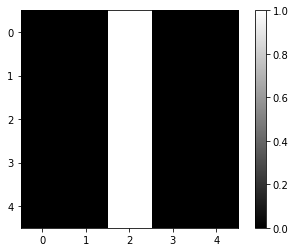

In [21]:
image=torch.zeros(1,1,5,5)
image[0,0,:,2]=1
print(image)

plt.imshow(image[0,0,:,:].numpy(), interpolation='nearest', cmap=plt.cm.gray)
plt.colorbar()
plt.show()

torch.Size([1, 3, 3, 3])
tensor([[-4.,  0.,  4.],
        [-4.,  0.,  4.],
        [-4.,  0.,  4.]], grad_fn=<UnbindBackward0>)


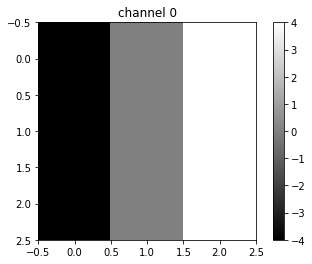

tensor([[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]], grad_fn=<UnbindBackward0>)


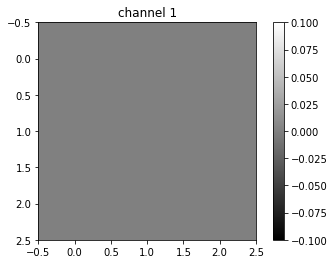

tensor([[3., 3., 3.],
        [3., 3., 3.],
        [3., 3., 3.]], grad_fn=<UnbindBackward0>)


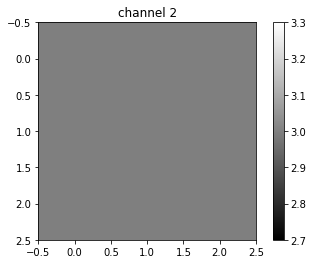

In [22]:
out=conv1(image)

print(out.shape)


for channel,image in enumerate(out[0]):
    plt.imshow(image.detach().numpy(), interpolation='nearest', cmap=plt.cm.gray)
    print(image)
    plt.title("channel {}".format(channel))
    plt.colorbar()
    plt.show()

Different kernels can be used to detect various features in an image. You can see that the first channel fluctuates, and the second two channels produce a constant value. The following figure summarizes the process:

<img src = "https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DL0110EN/notebook_images%20/chapter%206/6.1.2outputsgray.png" width = 750, align = "center">


tensor([[[[0., 0., 0., 0., 0.],
          [0., 0., 0., 0., 0.],
          [1., 1., 1., 1., 1.],
          [0., 0., 0., 0., 0.],
          [0., 0., 0., 0., 0.]]]])


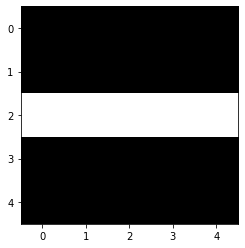

tensor([[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]], grad_fn=<UnbindBackward0>)


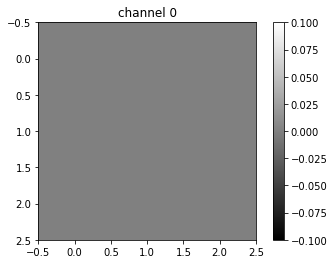

tensor([[-4., -4., -4.],
        [ 0.,  0.,  0.],
        [ 4.,  4.,  4.]], grad_fn=<UnbindBackward0>)


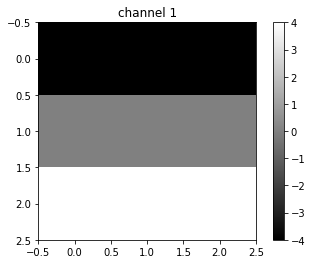

tensor([[3., 3., 3.],
        [3., 3., 3.],
        [3., 3., 3.]], grad_fn=<UnbindBackward0>)


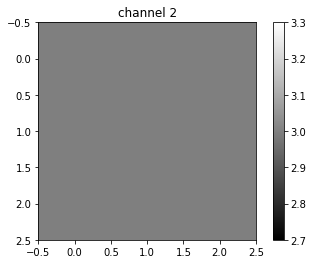

In [23]:
# if use different image results will be different


image1=torch.zeros(1,1,5,5)
image1[0,0,2,:]=1
print(image1)
plt.imshow(image1[0,0,:,:].detach().numpy(), interpolation='nearest', cmap=plt.cm.gray)
plt.show()


out1=conv1(image1)
for channel,image in enumerate(out1[0]):
    plt.imshow(image.detach().numpy(), interpolation='nearest', cmap=plt.cm.gray)
    print(image)
    plt.title("channel {}".format(channel))
    plt.colorbar()
    plt.show()

Summary :

<img src = "https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DL0110EN/notebook_images%20/chapter%206/6.1.2ouputsgray2.png" width = 750, align = "center">


## Multiple Input Channels

For two inputs, you can create two kernels. Each kernel performs a convolution on its associated input channel. The resulting output is added together as shown:


<img src = "https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DL0110EN/notebook_images%20/chapter%206/6.1.22chanalsinput.png" width = 750, align = "center">




tensor([[[[ 0.,  0.,  0.,  0.,  0.],
          [ 0.,  0.,  0.,  0.,  0.],
          [-2., -2., -2., -2., -2.],
          [ 0.,  0.,  0.,  0.,  0.],
          [ 0.,  0.,  0.,  0.,  0.]],

         [[ 0.,  0.,  0.,  0.,  0.],
          [ 0.,  0.,  0.,  0.,  0.],
          [ 1.,  1.,  1.,  1.,  1.],
          [ 0.,  0.,  0.,  0.,  0.],
          [ 0.,  0.,  0.,  0.,  0.]]]])
image2[0]:  tensor([[ 0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.],
        [-2., -2., -2., -2., -2.],
        [ 0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.]])


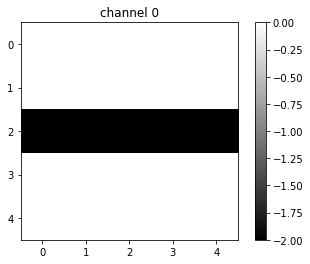

image2[0]:  tensor([[0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [1., 1., 1., 1., 1.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.]])


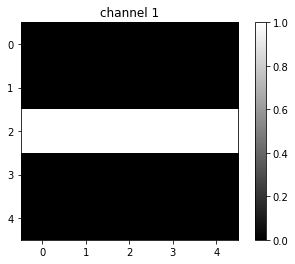

In [24]:
image2=torch.zeros(1,2,5,5)
image2[0,0,2,:]=-2
image2[0,1,2,:]=1
print(image2)


for channel,image in enumerate(image2[0]):
    plt.imshow(image.detach().numpy(), interpolation='nearest', cmap=plt.cm.gray)
    print("image2[0]: ", image)
    plt.title("channel {}".format(channel))
    plt.colorbar()
    plt.show()

In [25]:
conv3 = nn.Conv2d(in_channels=2, out_channels=1,kernel_size=3)


Gx1=torch.tensor([[0.0,0.0,0.0],[0,1.0,0],[0.0,0.0,0.0]])
conv3.state_dict()['weight'][0][0]=1*Gx1
conv3.state_dict()['weight'][0][1]=-2*Gx1
conv3.state_dict()['bias'][:]=torch.tensor([0.0])


print(conv3.state_dict()['weight'], "\n")

conv3(image2)

tensor([[[[ 0.,  0.,  0.],
          [ 0.,  1.,  0.],
          [ 0.,  0.,  0.]],

         [[-0., -0., -0.],
          [-0., -2., -0.],
          [-0., -0., -0.]]]]) 



tensor([[[[ 0.,  0.,  0.],
          [-4., -4., -4.],
          [ 0.,  0.,  0.]]]], grad_fn=<ConvolutionBackward0>)

The following images summarize the process. The object performs Convolution.

<img src = "https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DL0110EN/notebook_images%20/chapter%206/6.1.2_two_channal_example.png" width = 750, align = "center">


Then, it adds the result:

<img src = "https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DL0110EN/notebook_images%20/chapter%206/6.1.2_two_channal_example2.png" width = 750, align = "center">


## Multiple Input and Multiple Output Channels

When using multiple inputs and outputs, a kernel is created for each input, and the process is repeated for each output. The process is summarized in the following image.

There are two input channels and 3 output channels. For each channel, the input in red and purple is convolved with an individual kernel that is colored differently. As a result, there are three outputs.


<img src = "https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DL0110EN/notebook_images%20/chapter%206/6.1.2mulit_input_output.png" width = 750, align = "center">


In [26]:
conv4 = nn.Conv2d(in_channels=2, out_channels=3,kernel_size=3)



conv4.state_dict()['weight'][0][0]=torch.tensor([[0.0,0.0,0.0],[0,0.5,0],[0.0,0.0,0.0]])
conv4.state_dict()['weight'][0][1]=torch.tensor([[0.0,0.0,0.0],[0,0.5,0],[0.0,0.0,0.0]])


conv4.state_dict()['weight'][1][0]=torch.tensor([[0.0,0.0,0.0],[0,1,0],[0.0,0.0,0.0]])
conv4.state_dict()['weight'][1][1]=torch.tensor([[0.0,0.0,0.0],[0,-1,0],[0.0,0.0,0.0]])

conv4.state_dict()['weight'][2][0]=torch.tensor([[1.0,0,-1.0],[2.0,0,-2.0],[1.0,0.0,-1.0]])
conv4.state_dict()['weight'][2][1]=torch.tensor([[1.0,2.0,1.0],[0.0,0.0,0.0],[-1.0,-2.0,-1.0]])



conv4.state_dict()['bias'][:]=torch.tensor([0.0,0.0,0.0])

tensor([[1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.]])


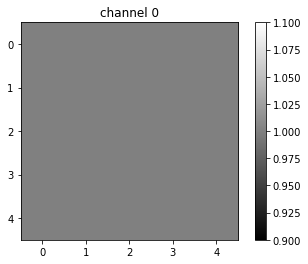

tensor([[0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 1., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.]])


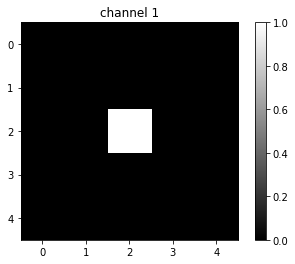

In [27]:
# 2 channel image

image4=torch.zeros(1,2,5,5)
image4[0][0]=torch.ones(5,5)
image4[0][1][2][2]=1
for channel,image in enumerate(image4[0]):
    plt.imshow(image.detach().numpy(), interpolation='nearest', cmap=plt.cm.gray)
    print(image)
    plt.title("channel {}".format(channel))
    plt.colorbar()
    plt.show()

In [28]:

# perform conv
z=conv4(image4)
z

tensor([[[[ 0.5000,  0.5000,  0.5000],
          [ 0.5000,  1.0000,  0.5000],
          [ 0.5000,  0.5000,  0.5000]],

         [[ 1.0000,  1.0000,  1.0000],
          [ 1.0000,  0.0000,  1.0000],
          [ 1.0000,  1.0000,  1.0000]],

         [[-1.0000, -2.0000, -1.0000],
          [ 0.0000,  0.0000,  0.0000],
          [ 1.0000,  2.0000,  1.0000]]]], grad_fn=<ConvolutionBackward0>)

The output of the first channel is given by:
<img src = "https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DL0110EN/notebook_images%20/chapter%206/6.1.2_%20multi_channel_1.png" width = 750, align = "center">

The output of the second channel is given by:
<img src = "https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DL0110EN/notebook_images%20/chapter%206/6.1.2_%20multi_channel_2.png" width = 750, align = "center">

The output of the third channel is given by:
<img src = "https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DL0110EN/notebook_images%20/chapter%206/6.1.2_%20multi_channel_3.png" width = 750, align = "center">


## Example

Do this: 

<img src = "https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DL0110EN/notebook_images%20/chapter%206/6.1.2Practice%20Questions_1.png" width = 750, align = "center">


In [29]:
imageA=torch.zeros(1,1,5,5)
imageB=torch.zeros(1,1,5,5)
imageA[0,0,2,:]=-2
imageB[0,0,2,:]=1


conv5 = nn.Conv2d(in_channels=1, out_channels=1,kernel_size=3)
conv6 = nn.Conv2d(in_channels=1, out_channels=1,kernel_size=3)


Gx1=torch.tensor([[0.0,0.0,0.0],[0,1.0,0],[0.0,0.0,0.0]])
conv5.state_dict()['weight'][0][0]=1*Gx1
conv6.state_dict()['weight'][0][0]=-2*Gx1
conv5.state_dict()['bias'][:]=torch.tensor([0.0])
conv6.state_dict()['bias'][:]=torch.tensor([0.0])


conv5(imageA)+conv6(imageB)

tensor([[[[ 0.,  0.,  0.],
          [-4., -4., -4.],
          [ 0.,  0.,  0.]]]], grad_fn=<AddBackward0>)

# Convolutional Neural Network


## Simple cnn

In [30]:
import torch 
import torch.nn as nn
import torchvision.transforms as transforms
import torchvision.datasets as dsets
import matplotlib.pylab as plt
import numpy as np

torch.manual_seed(4)

#Helper function

def plot_channels(W):
    #number of output channels 
    n_out=W.shape[0]
    #number of input channels 
    n_in=W.shape[1]
    w_min=W.min().item()
    w_max=W.max().item()
    fig, axes = plt.subplots(n_out,n_in)
    fig.subplots_adjust(hspace = 0.1)
    out_index=0
    in_index=0
    #plot outputs as rows inputs as columns 
    for ax in axes.flat:
    
        if in_index>n_in-1:
            out_index=out_index+1
            in_index=0
              
        ax.imshow(W[out_index,in_index,:,:], vmin=w_min, vmax=w_max, cmap='seismic')
        ax.set_yticklabels([])
        ax.set_xticklabels([])
        in_index=in_index+1

    plt.show()

def show_data(dataset,sample):

    plt.imshow(dataset.x[sample,0,:,:].numpy(),cmap='gray')
    plt.title('y='+str(dataset.y[sample].item()))
    plt.show()

#use to create show data

from torch.utils.data import Dataset, DataLoader
class Data(Dataset):
    def __init__(self,N_images=100,offset=0,p=0.9, train=False):
        """
        p:portability that pixel is wight  
        N_images:number of images 
        offset:set a random vertical and horizontal offset images by a sample should be less than 3 
        """
        if train==True:
            np.random.seed(1)  
        
        #make images multiple of 3 
        N_images=2*(N_images//2)
        images=np.zeros((N_images,1,11,11))
        start1=3
        start2=1
        self.y=torch.zeros(N_images).type(torch.long)

        for n in range(N_images):
            if offset>0:
        
                low=int(np.random.randint(low=start1, high=start1+offset, size=1))
                high=int(np.random.randint(low=start2, high=start2+offset, size=1))
            else:
                low=4
                high=1
        
            if n<=N_images//2:
                self.y[n]=0
                images[n,0,high:high+9,low:low+3]= np.random.binomial(1, p, (9,3))
            elif  n>N_images//2:
                self.y[n]=1
                images[n,0,low:low+3,high:high+9] = np.random.binomial(1, p, (3,9))
           
        
        
        self.x=torch.from_numpy(images).type(torch.FloatTensor)
        self.len=self.x.shape[0]
        del(images)
        np.random.seed(0)
    def __getitem__(self,index):      
        return self.x[index],self.y[index]
    def __len__(self):
        return self.len

#plot activation of neural networks

def plot_activations(A,number_rows= 1,name=""):
    A=A[0,:,:,:].detach().numpy()
    n_activations=A.shape[0]
    
    
    print(n_activations)
    A_min=A.min().item()
    A_max=A.max().item()

    if n_activations==1:

        # Plot the image.
        plt.imshow(A[0,:], vmin=A_min, vmax=A_max, cmap='seismic')

    else:
        fig, axes = plt.subplots(number_rows, n_activations//number_rows)
        fig.subplots_adjust(hspace = 0.4)
        for i,ax in enumerate(axes.flat):
            if i< n_activations:
                # Set the label for the sub-plot.
                ax.set_xlabel( "activation:{0}".format(i+1))

                # Plot the image.
                ax.imshow(A[i,:], vmin=A_min, vmax=A_max, cmap='seismic')
                ax.set_xticks([])
                ax.set_yticks([])
    plt.show()


# Utility function for computing output of convolutions takes a tuple of (h,w) and returns a tuple of (h,w)

def conv_output_shape(h_w, kernel_size=1, stride=1, pad=0, dilation=1):
    #by Duane Nielsen
    from math import floor
    if type(kernel_size) is not tuple:
        kernel_size = (kernel_size, kernel_size)
    h = floor( ((h_w[0] + (2 * pad) - ( dilation * (kernel_size[0] - 1) ) - 1 )/ stride) + 1)
    w = floor( ((h_w[1] + (2 * pad) - ( dilation * (kernel_size[1] - 1) ) - 1 )/ stride) + 1)
    return h, w

In [31]:
# Prepare data

N_images=10000
train_dataset=Data(N_images=N_images)

#testing data
validation_dataset=Data(N_images=1000,train=False)
validation_dataset

Data Visualization


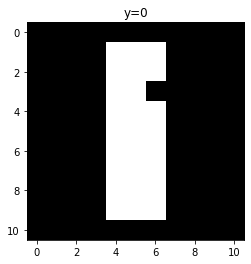

In [32]:
show_data(train_dataset,0)

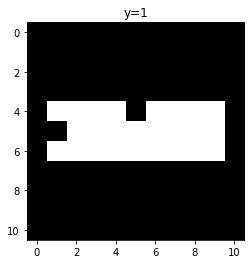

In [33]:
show_data(train_dataset,N_images//2+2)

### Build a Convolutional Neral Network Class
The input image is 11 x11, the following will change the size of the activations:

<ul>
<il>convolutional layer</il> 
</ul>
<ul>
<il>max pooling layer</il> 
</ul>
<ul>
<il>convolutional layer </il>
</ul>
<ul>
<il>max pooling layer </il>
</ul>

with the following parameters <code>kernel_size</code>, <code>stride</code> and <code> pad</code>.
We use the following  lines of code to change the image before we get tot he fully connected layer



In [34]:
out=conv_output_shape((11,11), kernel_size=2, stride=1, pad=0, dilation=1)
print(out)
out1=conv_output_shape(out, kernel_size=2, stride=1, pad=0, dilation=1)
print(out1)
out2=conv_output_shape(out1, kernel_size=2, stride=1, pad=0, dilation=1)
print(out2)

out3=conv_output_shape(out2, kernel_size=2, stride=1, pad=0, dilation=1)
print(out3)

(10, 10)
(9, 9)
(8, 8)
(7, 7)


Build a Convolutional Network class with two Convolutional layers and one fully connected layer. Pre-determine the size of the final output matrix. The parameters in the constructor are the number of output channels for the first and second layer.


In [35]:
class CNN(nn.Module):
    def __init__(self,out_1=2,out_2=1):
        
        super(CNN,self).__init__()
        #first Convolutional layers 
        self.cnn1=nn.Conv2d(in_channels=1,out_channels=out_1,kernel_size=2,padding=0)
        self.maxpool1=nn.MaxPool2d(kernel_size=2 ,stride=1)

        #second Convolutional layers
        self.cnn2=nn.Conv2d(in_channels=out_1,out_channels=out_2,kernel_size=2,stride=1,padding=0)
        self.maxpool2=nn.MaxPool2d(kernel_size=2 ,stride=1)
        #max pooling 

        #fully connected layer 
        self.fc1=nn.Linear(out_2*7*7,2)
        
    def forward(self,x):
        #first Convolutional layers
        x=self.cnn1(x)
        #activation function 
        x=torch.relu(x)
        #max pooling 
        x=self.maxpool1(x)
        #first Convolutional layers
        x=self.cnn2(x)
        #activation function
        x=torch.relu(x)
        #max pooling
        x=self.maxpool2(x)
        #flatten output 
        x=x.view(x.size(0),-1)
        #fully connected layer
        x=self.fc1(x)
        return x
    
    def activations(self,x):
        #outputs activation this is not necessary just for fun 
        z1=self.cnn1(x)
        a1=torch.relu(z1)
        out=self.maxpool1(a1)
        
        z2=self.cnn2(out)
        a2=torch.relu(z2)
        out=self.maxpool2(a2)
        out=out.view(out.size(0),-1)
        return z1,a1,z2,a2,out        

### Define the Convolutional Neral Network Classifier , Criterion function, Optimizer and Train the  Model 

In [36]:
model=CNN(2,1)
print(model)



CNN(
  (cnn1): Conv2d(1, 2, kernel_size=(2, 2), stride=(1, 1))
  (maxpool1): MaxPool2d(kernel_size=2, stride=1, padding=0, dilation=1, ceil_mode=False)
  (cnn2): Conv2d(2, 1, kernel_size=(2, 2), stride=(1, 1))
  (maxpool2): MaxPool2d(kernel_size=2, stride=1, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=49, out_features=2, bias=True)
)


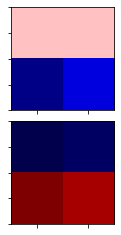

In [37]:
plot_channels(model.state_dict()['cnn1.weight'])


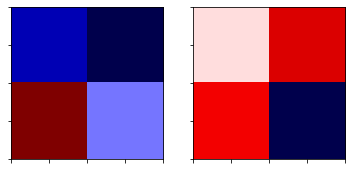

In [38]:
plot_channels(model.state_dict()['cnn2.weight'])

### Define the loss function

In [39]:
criterion=nn.CrossEntropyLoss()

### Optimizer

In [40]:
learning_rate=0.001

optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

In [41]:
train_loader=torch.utils.data.DataLoader(dataset=train_dataset,batch_size=10)
validation_loader=torch.utils.data.DataLoader(dataset=validation_dataset,batch_size=20)

### Training Loop

In [42]:
n_epochs=10
cost_list=[]
accuracy_list=[]
N_test=len(validation_dataset)
cost=0
#n_epochs
for epoch in range(n_epochs):
    cost=0    
    for x, y in train_loader:
      

        #clear gradient 
        optimizer.zero_grad()
        #make a prediction 
        z=model(x)
        # calculate loss 
        loss=criterion(z,y)
        # calculate gradients of parameters 
        loss.backward()
        # update parameters 
        optimizer.step()
        cost+=loss.item()
    cost_list.append(cost)
        
        
    correct=0
    #perform a prediction on the validation  data  
    for x_test, y_test in validation_loader:

        z=model(x_test)
        _,yhat=torch.max(z.data,1)

        correct+=(yhat==y_test).sum().item()
        

    accuracy=correct/N_test

    accuracy_list.append(accuracy)

### Loss and acc curves

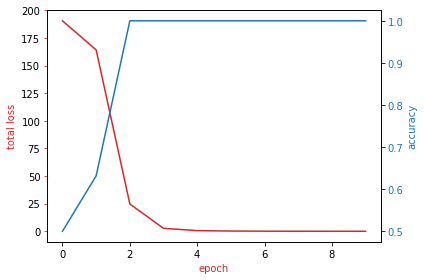

In [43]:
fig, ax1 = plt.subplots()
color = 'tab:red'
ax1.plot(cost_list,color=color)
ax1.set_xlabel('epoch',color=color)
ax1.set_ylabel('total loss',color=color)
ax1.tick_params(axis='y', color=color)
    
ax2 = ax1.twinx()  
color = 'tab:blue'
ax2.set_ylabel('accuracy', color=color)  
ax2.plot( accuracy_list, color=color)
ax2.tick_params(axis='y', labelcolor=color)
fig.tight_layout()

### View the results of the parameters for the Convolutional layers

In [44]:
model.state_dict()['cnn1.weight']

tensor([[[[ 0.3564,  0.4762],
          [-0.1491, -0.2238]]],


        [[[-0.4213, -0.2538],
          [ 0.9377,  0.8766]]]])

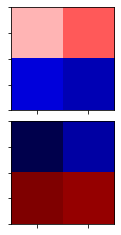

In [45]:
plot_channels(model.state_dict()['cnn1.weight'])

In [46]:
model.state_dict()['cnn1.weight']

tensor([[[[ 0.3564,  0.4762],
          [-0.1491, -0.2238]]],


        [[[-0.4213, -0.2538],
          [ 0.9377,  0.8766]]]])

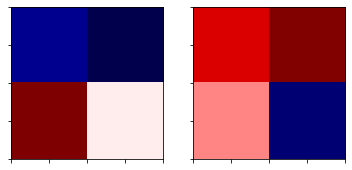

In [47]:
plot_channels(model.state_dict()['cnn2.weight'])

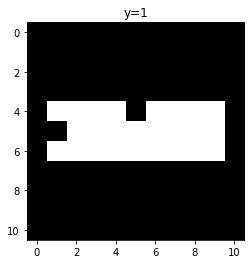

In [48]:
show_data(train_dataset,N_images//2+2)

In [49]:
out=model.activations(train_dataset[N_images//2+2][0].view(1,1,11,11))
out=model.activations(train_dataset[0][0].view(1,1,11,11))

2


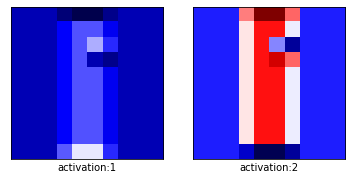

In [50]:
plot_activations(out[0],number_rows=1,name=" feature map")
plt.show()


1


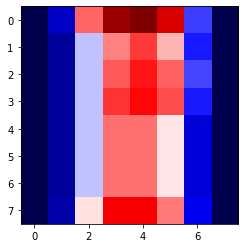

In [51]:
plot_activations(out[2],number_rows=1,name="2nd feature map")
plt.show()

1


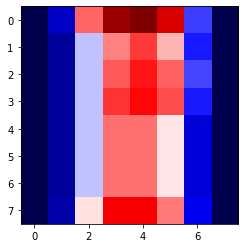

In [52]:
plot_activations(out[3],number_rows=1,name="first feature map")
plt.show()

In [53]:
out1=out[4][0].detach().numpy()

In [54]:
out0=model.activations(train_dataset[100][0].view(1,1,11,11))[4][0].detach().numpy()
out0

array([0.7299932 , 1.7405488 , 2.359813  , 2.4753225 , 2.4753225 ,
       2.0972135 , 1.0211557 , 0.59982485, 1.2955571 , 1.7659246 ,
       1.9037374 , 1.9037374 , 1.745411  , 1.0336778 , 0.59982485,
       1.2955571 , 1.8406304 , 1.9393731 , 1.9393731 , 1.7908455 ,
       1.0336778 , 0.59982485, 1.336003  , 1.8664175 , 1.9393731 ,
       1.9393731 , 1.7908455 , 0.9442032 , 0.59982485, 1.336003  ,
       1.8664175 , 1.8664175 , 1.8529166 , 1.642449  , 0.78028965,
       0.59982485, 1.3914654 , 2.1225367 , 2.2296126 , 2.2296126 ,
       1.8063625 , 0.78028965, 0.64027065, 1.6130513 , 2.1225367 ,
       2.2296126 , 2.2296126 , 1.8063625 , 0.8572421 ], dtype=float32)

Text(0, 0.5, 'Activation')

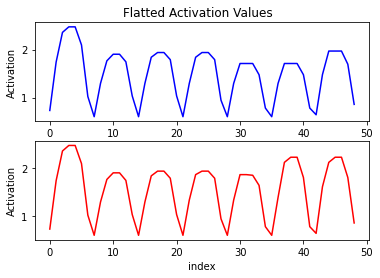

In [55]:
plt.subplot(2, 1, 1)
plt.plot( out1, 'b')
plt.title('Flatted Activation Values  ')
plt.ylabel('Activation')
plt.xlabel('index')
plt.subplot(2, 1, 2)
plt.plot(out0, 'r')
plt.xlabel('index')
plt.ylabel('Activation')

# CNN: MNIST *data*

In [56]:
import torch 
import torch.nn as nn
import torchvision.transforms as transforms
import torchvision.datasets as dsets
import matplotlib.pylab as plt
import numpy as np

Define some plot functions


In [57]:
# Define the function for plotting the channels

def plot_channels(W):
    n_out = W.shape[0]
    n_in = W.shape[1]
    w_min = W.min().item()
    w_max = W.max().item()
    fig, axes = plt.subplots(n_out, n_in)
    fig.subplots_adjust(hspace=0.1)
    out_index = 0
    in_index = 0
    
    #plot outputs as rows inputs as columns 
    for ax in axes.flat:
        if in_index > n_in-1:
            out_index = out_index + 1
            in_index = 0
        ax.imshow(W[out_index, in_index, :, :], vmin=w_min, vmax=w_max, cmap='seismic')
        ax.set_yticklabels([])
        ax.set_xticklabels([])
        in_index = in_index + 1

    plt.show()


# Define the function for plotting the parameters

def plot_parameters(W, number_rows=1, name="", i=0):
    W = W.data[:, i, :, :]
    n_filters = W.shape[0]
    w_min = W.min().item()
    w_max = W.max().item()
    fig, axes = plt.subplots(number_rows, n_filters // number_rows)
    fig.subplots_adjust(hspace=0.4)

    for i, ax in enumerate(axes.flat):
        if i < n_filters:
            # Set the label for the sub-plot.
            ax.set_xlabel("kernel:{0}".format(i + 1))

            # Plot the image.
            ax.imshow(W[i, :], vmin=w_min, vmax=w_max, cmap='seismic')
            ax.set_xticks([])
            ax.set_yticks([])
    plt.suptitle(name, fontsize=10)    
    plt.show()

# Define the function for plotting the activations

def plot_activations(A, number_rows=1, name="", i=0):
    A = A[0, :, :, :].detach().numpy()
    n_activations = A.shape[0]
    A_min = A.min().item()
    A_max = A.max().item()
    fig, axes = plt.subplots(number_rows, n_activations // number_rows)
    fig.subplots_adjust(hspace = 0.4)

    for i, ax in enumerate(axes.flat):
        if i < n_activations:
            # Set the label for the sub-plot.
            ax.set_xlabel("activation:{0}".format(i + 1))

            # Plot the image.
            ax.imshow(A[i, :], vmin=A_min, vmax=A_max, cmap='seismic')
            ax.set_xticks([])
            ax.set_yticks([])
    plt.show()


def show_data(data_sample):
    plt.imshow(data_sample[0].numpy().reshape(IMAGE_SIZE, IMAGE_SIZE), cmap='gray')
    plt.title('y = '+ str(data_sample[1]))

In [58]:


IMAGE_SIZE = 16

#Define transforms
composed = transforms.Compose([transforms.Resize((IMAGE_SIZE, IMAGE_SIZE)), transforms.ToTensor()])


#Make training dataset
train_dataset = dsets.MNIST(root='./data', train=True, download=True, transform=composed)
# Make the validating 
validation_dataset = dsets.MNIST(root='./data', train=False, download=True, transform=composed)




  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



### Build a Convolutional Neural Network Class

Build a Convolutional Network class with two Convolutional layers and one fully connected layer. Pre-determine the size of the final output matrix. The parameters in the constructor are the number of output channels for the first and second layer.


In [59]:
class CNN(nn.Module):
    
    # Contructor
    def __init__(self, out_1=16, out_2=32):
        super(CNN, self).__init__()
        self.cnn1 = nn.Conv2d(in_channels=1, out_channels=out_1, kernel_size=5, padding=2)
        self.maxpool1=nn.MaxPool2d(kernel_size=2)

        self.cnn2 = nn.Conv2d(in_channels=out_1, out_channels=out_2, kernel_size=5, stride=1, padding=2)
        self.maxpool2=nn.MaxPool2d(kernel_size=2)
        self.fc1 = nn.Linear(out_2 * 4 * 4, 10)
    
    # Prediction
    def forward(self, x):
        x = self.cnn1(x)
        x = torch.relu(x)
        x = self.maxpool1(x)
        x = self.cnn2(x)
        x = torch.relu(x)
        x = self.maxpool2(x)
        x = x.view(x.size(0), -1)
        x = self.fc1(x)
        return x
    
    # Outputs in each steps
    def activations(self, x):
        #outputs activation this is not necessary
        z1 = self.cnn1(x)
        a1 = torch.relu(z1)
        out = self.maxpool1(a1)
        
        z2 = self.cnn2(out)
        a2 = torch.relu(z2)
        out1 = self.maxpool2(a2)
        out = out.view(out.size(0),-1)
        return z1, a1, z2, a2, out1,out

### Define the Convolutional Neural Network Classifier, Criterion function, Optimizer and Train the Model

In [60]:
# Create the model object using CNN class
model = CNN(out_1=16, out_2=32)

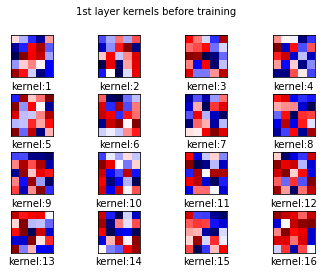

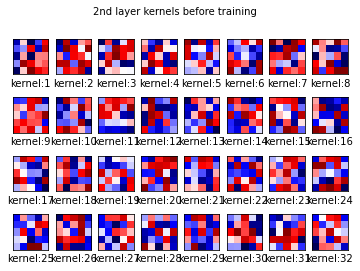

In [61]:
# Plot the parameters
#Plot the model parameters for the kernels before training the kernels. The kernels are initialized randomly.

plot_parameters(model.state_dict()['cnn1.weight'], number_rows=4, name="1st layer kernels before training ")
plot_parameters(model.state_dict()['cnn2.weight'], number_rows=4, name='2nd layer kernels before training' )

### Define the loss function, the optimizer and the dataset loader


In [62]:
criterion = nn.CrossEntropyLoss()
learning_rate = 0.1
optimizer = torch.optim.SGD(model.parameters(), lr = learning_rate)
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=100)
validation_loader = torch.utils.data.DataLoader(dataset=validation_dataset, batch_size=5000)

### Train the model and determine validation accuracy technically test accuracy 

In [63]:
# Train the model

n_epochs=3
cost_list=[]
accuracy_list=[]
N_test=len(validation_dataset)
COST=0

def train_model(n_epochs):
    for epoch in range(n_epochs):
        COST=0
        for x, y in train_loader:
            optimizer.zero_grad()
            z = model(x)
            loss = criterion(z, y)
            loss.backward()
            optimizer.step()
            COST+=loss.data
        
        cost_list.append(COST)
        correct=0
        #perform a prediction on the validation  data  
        for x_test, y_test in validation_loader:
            z = model(x_test)
            _, yhat = torch.max(z.data, 1)
            correct += (yhat == y_test).sum().item()
        accuracy = correct / N_test
        accuracy_list.append(accuracy)
     
train_model(n_epochs)

### Plot Acc AND Loss on val dataset

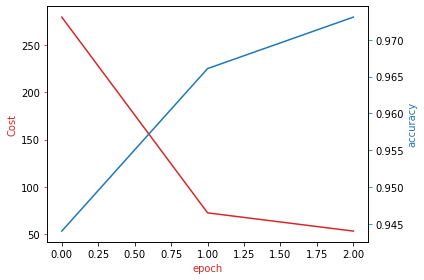

In [64]:
# Plot the loss and accuracy

fig, ax1 = plt.subplots()
color = 'tab:red'
ax1.plot(cost_list, color=color)
ax1.set_xlabel('epoch', color=color)
ax1.set_ylabel('Cost', color=color)
ax1.tick_params(axis='y', color=color)
    
ax2 = ax1.twinx()  
color = 'tab:blue'
ax2.set_ylabel('accuracy', color=color) 
ax2.set_xlabel('epoch', color=color)
ax2.plot( accuracy_list, color=color)
ax2.tick_params(axis='y', color=color)
fig.tight_layout()

### View the results of the parameters for the Convolutional layers


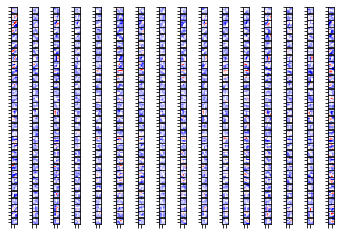

In [65]:
# Plot the channels

plot_channels(model.state_dict()['cnn1.weight'])
plot_channels(model.state_dict()['cnn2.weight'])




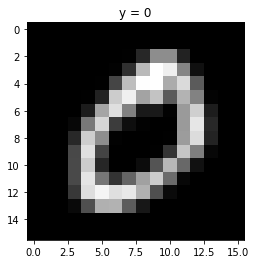

In [66]:
# Show the second image

show_data(train_dataset[1])

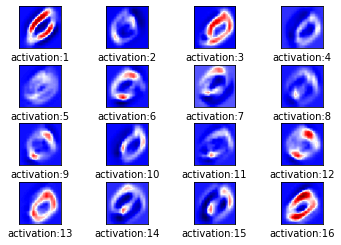

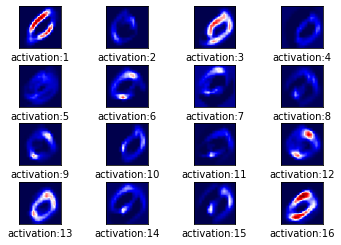

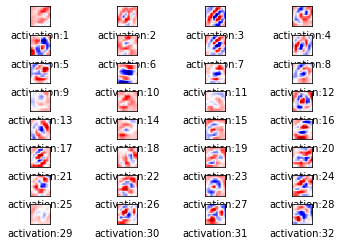

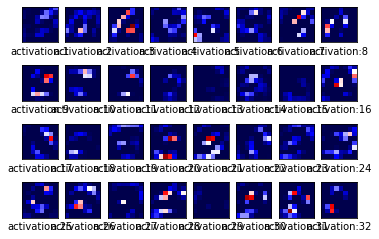

In [67]:
# Use the CNN activations class to see the steps

out = model.activations(train_dataset[1][0].view(1, 1, IMAGE_SIZE, IMAGE_SIZE))


# Plot the outputs after the first CNN

plot_activations(out[0], number_rows=4, name="Output after the 1st CNN")

# Plot the outputs after the first Relu

plot_activations(out[1], number_rows=4, name="Output after the 1st Relu")


# Plot the outputs after the second CNN

plot_activations(out[2], number_rows=32 // 4, name="Output after the 2nd CNN")



# Plot the outputs after the second Relu

plot_activations(out[3], number_rows=4, name="Output after the 2nd Relu")




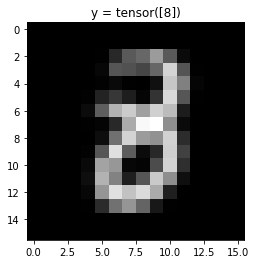

yhat:  tensor([3])


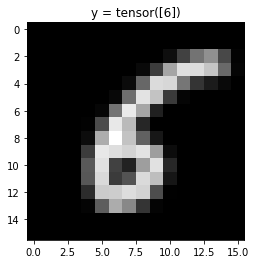

yhat:  tensor([5])


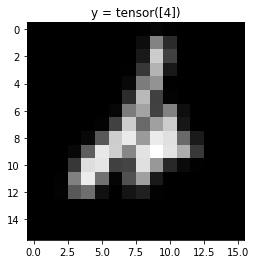

yhat:  tensor([2])


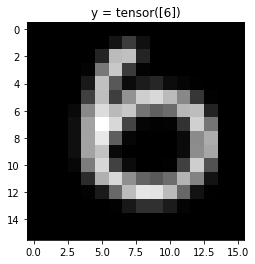

yhat:  tensor([0])


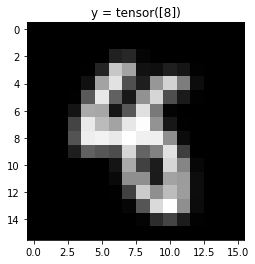

yhat:  tensor([4])


In [68]:
# Plot the mis-classified samples

count = 0
for x, y in torch.utils.data.DataLoader(dataset=validation_dataset, batch_size=1):
    z = model(x)
    _, yhat = torch.max(z, 1)
    if yhat != y:
        show_data((x, y))
        plt.show()
        print("yhat: ",yhat)
        count += 1
    if count >= 5:
        break  

# 

# CNN: MNIST data with Batch-Normalization

Like a fully connected network, we create a <code>BatchNorm2d</code> object, but we apply it to the 2D convolution object. First, we create objects <code>Conv2d</code> object; we require the number of output channels, specified by the variable <code>OUT</code>.

<code>self.cnn1 = nn.Conv2d(in_channels=1, out_channels=OUT, kernel_size=5, padding=2) </code>

We then create a Batch Norm  object for 2D convolution as follows:

<code>self.conv1\_bn = nn.BatchNorm2d(OUT)</code>

The parameter out is the number of channels in the output. We can then apply batch norm  after  the convolution operation :

<code>x = self.cnn1(x)</code>

<p></p>
 <code> x=self.conv1_bn(x)</code>


In [69]:
import torch 
import torch.nn as nn
import torchvision.transforms as transforms
import torchvision.datasets as dsets
import matplotlib.pylab as plt
import numpy as np
def show_data(data_sample):
    plt.imshow(data_sample[0].numpy().reshape(IMAGE_SIZE, IMAGE_SIZE), cmap='gray')
    plt.title('y = '+ str(data_sample[1]))

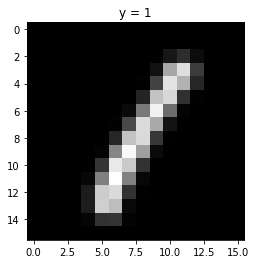

In [70]:
IMAGE_SIZE = 16

composed = transforms.Compose([transforms.Resize((IMAGE_SIZE, IMAGE_SIZE)), transforms.ToTensor()])
#train dataset
train_dataset = dsets.MNIST(root='./data', train=True, download=True, transform=composed)
# Make the validating 
validation_dataset = dsets.MNIST(root='./data', train=False, download=True, transform=composed)

# Show the data type for each element in dataset
type(train_dataset[0][1])
# The image for the fourth data element
show_data(train_dataset[3])

### Build a Two Convolutional Neural Network Class

Build a Convolutional Network class with two Convolutional layers and one fully connected layer. Pre-determine the size of the final output matrix. The parameters in the constructor are the number of output channels for the first and second layer.


In [71]:
class CNN(nn.Module):
    
    # Contructor
    def __init__(self, out_1=16, out_2=32):
        super(CNN, self).__init__()
        self.cnn1 = nn.Conv2d(in_channels=1, out_channels=out_1, kernel_size=5, padding=2)
        self.maxpool1=nn.MaxPool2d(kernel_size=2)

        self.cnn2 = nn.Conv2d(in_channels=out_1, out_channels=out_2, kernel_size=5, stride=1, padding=2)
        self.maxpool2=nn.MaxPool2d(kernel_size=2)
        self.fc1 = nn.Linear(out_2 * 4 * 4, 10)
    
    # Prediction
    def forward(self, x):
        x = self.cnn1(x)
        x = torch.relu(x)
        x = self.maxpool1(x)
        x = self.cnn2(x)
        x = torch.relu(x)
        x = self.maxpool2(x)
        x = x.view(x.size(0), -1)
        x = self.fc1(x)
        return x


Build a Convolutional Network class with two Convolutional layers and one fully connected layer. But we add Batch Norm for the convolutional layers.


In [72]:
class CNN_batch(nn.Module):
    
    # Contructor
    def __init__(self, out_1=16, out_2=32,number_of_classes=10):
        super(CNN_batch, self).__init__()
        self.cnn1 = nn.Conv2d(in_channels=1, out_channels=out_1, kernel_size=5, padding=2)
        self.conv1_bn = nn.BatchNorm2d(out_1)

        self.maxpool1=nn.MaxPool2d(kernel_size=2)
        
        self.cnn2 = nn.Conv2d(in_channels=out_1, out_channels=out_2, kernel_size=5, stride=1, padding=2)
        self.conv2_bn = nn.BatchNorm2d(out_2)

        self.maxpool2=nn.MaxPool2d(kernel_size=2)
        self.fc1 = nn.Linear(out_2 * 4 * 4, number_of_classes)
        self.bn_fc1 = nn.BatchNorm1d(10)
    
    # Prediction
    def forward(self, x):
        x = self.cnn1(x)
        x=self.conv1_bn(x)
        x = torch.relu(x)
        x = self.maxpool1(x)
        x = self.cnn2(x)
        x=self.conv2_bn(x)
        x = torch.relu(x)
        x = self.maxpool2(x)
        x = x.view(x.size(0), -1)
        x = self.fc1(x)
        x=self.bn_fc1(x)
        return x

### Function to train the model

In [73]:
def train_model(model,train_loader,validation_loader,optimizer,n_epochs=4):
    
    #global variable 
    N_test=len(validation_dataset)
    accuracy_list=[]
    loss_list=[]
    for epoch in range(n_epochs):
        for x, y in train_loader:
            model.train()
            optimizer.zero_grad()
            z = model(x)
            loss = criterion(z, y)
            loss.backward()
            optimizer.step()
            loss_list.append(loss.data)

        correct=0
        #perform a prediction on the validation  data  
        for x_test, y_test in validation_loader:
            model.eval()
            z = model(x_test)
            _, yhat = torch.max(z.data, 1)
            correct += (yhat == y_test).sum().item()
        accuracy = correct / N_test
        accuracy_list.append(accuracy)
     
    return accuracy_list, loss_list

### Define the Convolutional Neural Network Classifier, Criterion function, Optimizer and Train the Model

In [74]:
# Create the model object using CNN class
model = CNN(out_1=16, out_2=32)

criterion = nn.CrossEntropyLoss()
learning_rate = 0.1
optimizer = torch.optim.SGD(model.parameters(), lr = learning_rate)
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=100)
validation_loader = torch.utils.data.DataLoader(dataset=validation_dataset, batch_size=5000)

# Train the model
accuracy_list_normal, loss_list_normal=train_model(model=model,n_epochs=10,train_loader=train_loader,validation_loader=validation_loader,optimizer=optimizer)

Repeat the Process for the model with  batch norm

In [75]:

model_batch=CNN_batch(out_1=16, out_2=32)
criterion = nn.CrossEntropyLoss()
learning_rate = 0.1
optimizer = torch.optim.SGD(model_batch.parameters(), lr = learning_rate)
accuracy_list_batch, loss_list_batch=train_model(model=model_batch,n_epochs=10,train_loader=train_loader,validation_loader=validation_loader,optimizer=optimizer)

### Loss Plot

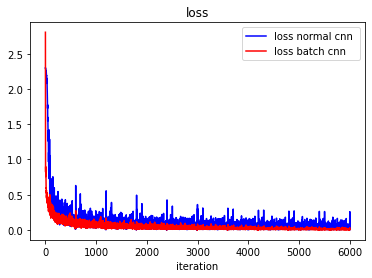

In [76]:
# Plot the loss and accuracy

plt.plot(loss_list_normal, 'b',label='loss normal cnn ')
plt.plot(loss_list_batch,'r',label='loss batch cnn')
plt.xlabel('iteration')
plt.title("loss")
plt.legend()

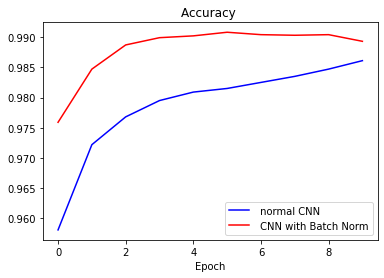

In [77]:
plt.plot(accuracy_list_normal, 'b',label=' normal CNN')
plt.plot(accuracy_list_batch,'r',label=' CNN with Batch Norm')
plt.xlabel('Epoch')
plt.title("Accuracy ")
plt.legend()
plt.show()

# Reference

https://cs231n.github.io/convolutional-networks/

https://pytorch.org/tutorials/beginner/blitz/cifar10_tutorial.html

https://pytorch.org/tutorials/